In [7]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="hide/show code"></form>''')

In [1]:
%load_ext autoreload
%autoreload 2

import math
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import sys

import plotly.express as px

project_path = Path('.')
data_path = project_path / 'data'
src_path = project_path / 'python' / 'src'
sys.path.append(str(src_path))

from utils import clean_bp
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
        'width': 1024,
        'height': 768,
        'scroll': True,
})

sns.set_palette("colorblind")
color_blind_list = sns.color_palette("colorblind", 8)
sns.set(style="whitegrid", rc={'figure.figsize': (15, 8)})

# Quelles énergies pour demain ?

- Axel Camara
- François Culière

- Matthieu Desse

- Parfait Fangue

- Vincent Richard

# 1. Contexte

# 2. Profil de consommation énergétique

# 3. Quelle place pour les énergies renouvelables ?


# 4. Conclusion - Ouverture

# Contexte : des ressources limitées pour un besoin toujours croissant

In [2]:
file_production = data_path / "Total_Energy_production.csv"
file_consumption = data_path / "Total_Energy_consumption.csv"

df_production = pd.read_csv(str(file_production), header=2)
df_consumption = pd.read_csv(str(file_consumption), header=2, na_values=None)

df_production = df_production.dropna()
df_consumption = df_consumption.dropna()

df_production.drop(df_production.columns[[len(df_production.columns)-1,len(df_production.columns)-2]], axis=1, inplace=True)
df_consumption.drop(df_consumption.columns[[len(df_consumption.columns)-1,len(df_consumption.columns)-2]], axis=1, inplace=True)

df_production = df_production.set_index(["Unnamed: 0"]) 
df_consumption = df_consumption.set_index(["Unnamed: 0"]) 

df_production.loc["tot/an"] = df_production.sum()
df_consumption.loc["tot/an"] = df_consumption.sum()

todrop = ["World","OECD","G7","BRICS","Europe","European Union","CIS","North America","Latin America","Middle-East","Pacific","tot/an"]

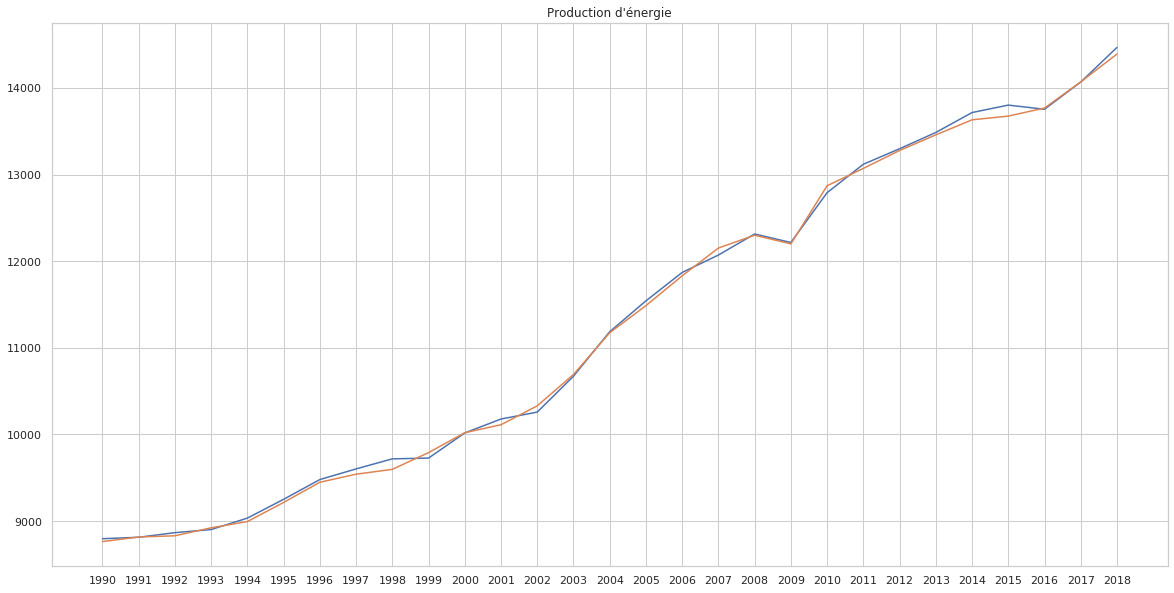

In [3]:
#plt.figure
fig = plt.figure(1, figsize=(20, 10))
ax1 = plt.plot(df_production.columns, df_production.loc["World"])
ax2 = plt.plot(df_consumption.columns, df_consumption.loc["World"])
#ax1([2000,2019])

#ax1.legend("dsf")

_ = plt.title("Production d'énergie")

![earth_overshoot](data/images/earth_overshoot.jpg)

In [4]:
file_CO2 = data_path / "CAIT Country GHG Emissions - csv 10022017"/ "CAIT Country CO2 Emissions.csv"

df = pd.read_csv(str(file_CO2), header=1)
df = df.rename(columns={"Total CO2 Emissions Excluding Land-Use Change and Forestry (MtCO2)" : "CO2_Emissions(MtCO2)" })

table = pd.pivot_table(df, values="CO2_Emissions(MtCO2)", index=["Country"],columns=["Year"], aggfunc=np.sum, dropna=True)

table.loc["tot/an"] = table.sum()*0.1

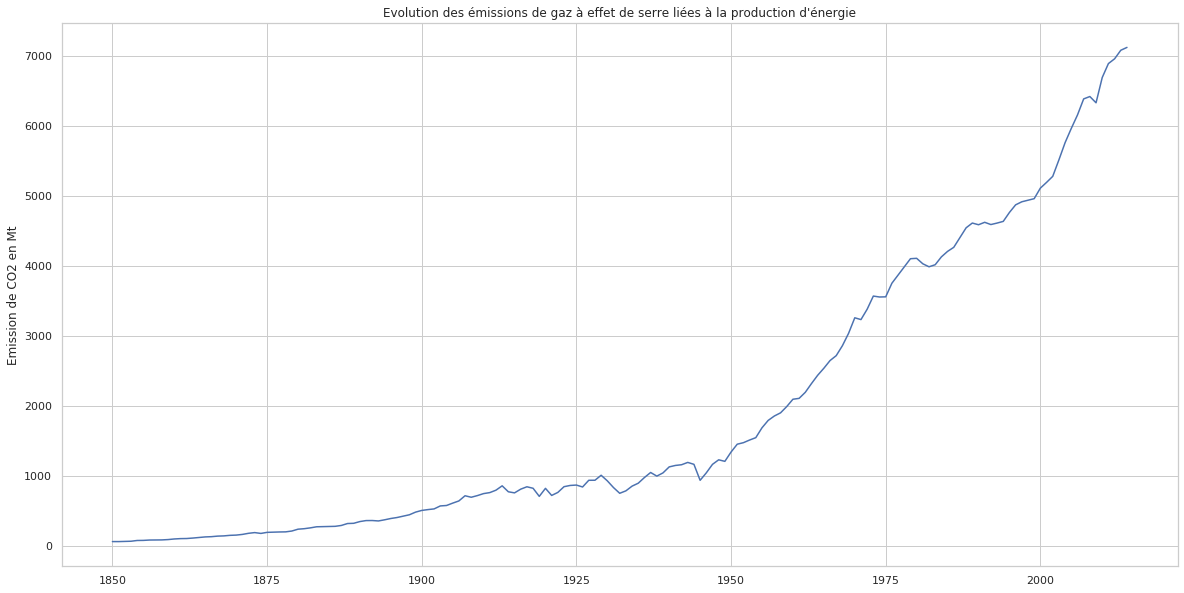

In [5]:
#plt.figure
fig = plt.figure(1, figsize=(20, 10))
ax = plt.plot(table.columns, table.loc["tot/an"])
plt.ylabel("Emission de CO2 en Mt")
_ = plt.title("Evolution des émissions de gaz à effet de serre liées à la production d'énergie")

# Quelle consommation d'énergie pour la terre ? Les énergies primaires plébiscitées  

In [6]:
df_tot =clean_bp(str(data_path / 'bp-stats-review-2019-all-data.xlsx'),'Primary Energy Consumption')
df_tot = df_tot.reset_index(1)
df_tot['date'] = df_tot['date'].dt.year
df_tot = df_tot.rename(columns={"Million tonnes oil equivalent":'Total'})
df_date_tot = df_tot.groupby('date').sum()
df_tot = df_tot.reset_index().set_index(['country', 'date'])

In [7]:
df_oil =clean_bp(str(data_path / 'bp-stats-review-2019-all-data.xlsx'),'Oil Consumption - Tonnes', skipfooter=14)
df_oil = df_oil.reset_index(1)
df_oil['date'] = df_oil['date'].dt.year
df_oil = df_oil.rename(columns={"Million tonnes":'oil'})
df_oil = df_oil.reset_index().set_index(['country', 'date'])

In [8]:
df_gaz =clean_bp(str(data_path / 'bp-stats-review-2019-all-data.xlsx'),'Gas Consumption - Mtoe', skipfooter=14)
df_gaz = df_gaz.reset_index(1)
df_gaz['date'] = df_gaz['date'].dt.year
df_gaz = df_gaz.rename(columns={"Million tonnes oil equivalent":'gaz'})
df_gaz = df_gaz.reset_index().set_index(['country', 'date'])

In [9]:
df_coal =clean_bp(str(data_path / 'bp-stats-review-2019-all-data.xlsx'),'Coal Consumption - Mtoe', skipfooter=14)
df_coal = df_coal.reset_index(1)
df_coal['date'] = df_coal['date'].dt.year
df_coal = df_coal.rename(columns={"Million tonnes oil equivalent":'coal'})
df_coal = df_coal.reset_index().set_index(['country', 'date'])

In [10]:
df_nuclear =clean_bp(str(data_path / 'bp-stats-review-2019-all-data.xlsx'),'Nuclear Consumption - Mtoe', skipfooter=14)
df_nuclear = df_nuclear.reset_index(1)
df_nuclear['date'] = df_nuclear['date'].dt.year
df_nuclear = df_nuclear.rename(columns={"Million tonnes oil equivalent":'nuclear'})
df_nuclear = df_nuclear.reset_index().set_index(['country', 'date'])

In [11]:
df_hydro =clean_bp(str(data_path / 'bp-stats-review-2019-all-data.xlsx'),'Hydro Consumption - Mtoe', skipfooter=14)
df_hydro = df_hydro.reset_index(1)
df_hydro['date'] = df_hydro['date'].dt.year
df_hydro = df_hydro.rename(columns={"Million tonnes oil equivalent":'hydro'})
df_hydro = df_hydro.reset_index().set_index(['country', 'date'])

In [12]:
df_renew =clean_bp(str(data_path / 'bp-stats-review-2019-all-data.xlsx'),'Renewables - Mtoe', skipfooter=14)
df_renew = df_renew.reset_index(1)
df_renew['date'] = df_renew['date'].dt.year
df_renew = df_renew.rename(columns={"Million tonnes oil equivalent":'renewable'})
df_renew = df_renew.reset_index().set_index(['country', 'date'])

In [13]:
df_solar =clean_bp(str(data_path / 'bp-stats-review-2019-all-data.xlsx'),'Solar Consumption - Mtoe', skipfooter=14)
df_solar = df_solar.reset_index(1)
df_solar['date'] = df_solar['date'].dt.year
df_solar = df_solar.rename(columns={"Million tonnes oil equivalent":'solar'})
df_solar = df_solar.reset_index().set_index(['country', 'date'])

In [14]:
df_biomass =clean_bp(str(data_path / 'bp-stats-review-2019-all-data.xlsx'),'Geo Biomass Other - Mtoe', skipfooter=14)
df_biomass = df_biomass.reset_index(1)
df_biomass['date'] = df_biomass['date'].dt.year
df_biomass = df_biomass.rename(columns={"Million tonnes oil equivalent":'biomass'})
df_biomass = df_biomass.reset_index().set_index(['country', 'date'])

In [15]:
df_concat = pd.concat( [df_gaz, df_oil, df_coal, df_nuclear, df_hydro, df_renew, df_solar, df_biomass], sort=False, axis=1)

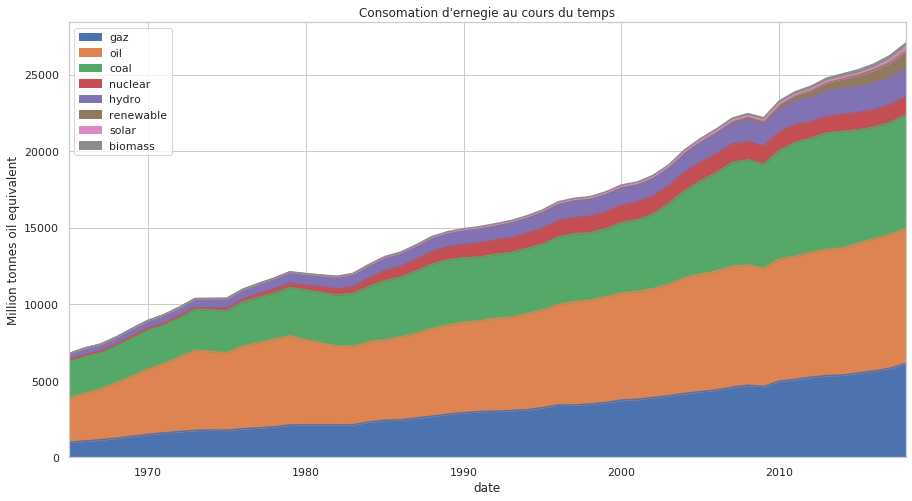

In [34]:
ax = df_concat.groupby("date").sum().plot(kind='area')
ax.set_ylabel('Million tonnes oil equivalent')
_ = ax.set_title("Consomation d'ernegie au cours du temps")

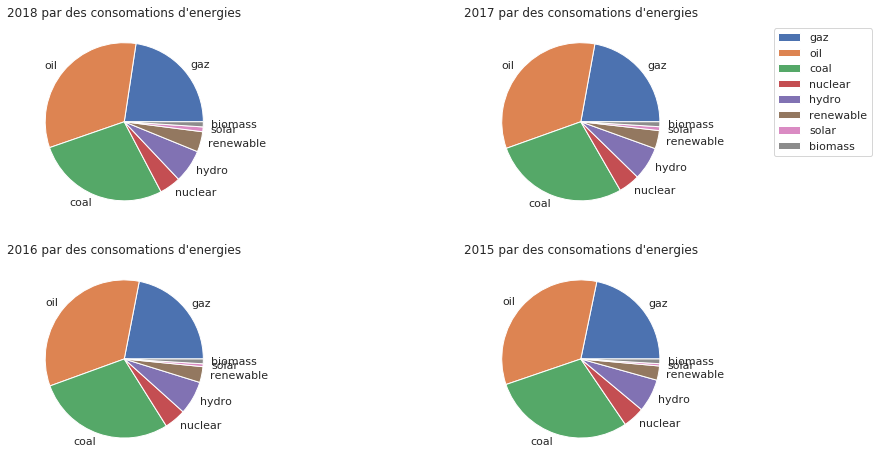

In [35]:
fig, axes = plt.subplots(nrows=2, ncols=2)

ax = df_concat.groupby("date").sum().iloc[-1:,:].stack().reset_index(0).plot.pie(y=0, ax=axes[0,0], legend=False)
ax.set_ylabel("")
ax.set_title("2018 par des consomations d'energies")
# ax.legend(False)
ax = df_concat.groupby("date").sum().iloc[-2:-1,:].stack().reset_index(0).plot.pie(y=0, ax=axes[0,1])
ax.set_ylabel("")
ax.set_title("2017 par des consomations d'energies")
ax.legend(bbox_to_anchor=(1, 0., 1, 1))
ax = df_concat.groupby("date").sum().iloc[-3:-2,:].stack().reset_index(0).plot.pie(y=0, ax=axes[1,0], legend=False)
ax.set_ylabel("")
ax.set_title("2016 par des consomations d'energies")
ax = df_concat.groupby("date").sum().iloc[-4:-3,:].stack().reset_index(0).plot.pie(y=0, ax=axes[1,1], legend=False)
ax.set_ylabel("")
_ = ax.set_title("2015 par des consomations d'energies")

In [2]:
df = clean_bp(data_path / "bp-stats-review-2019-all-data.xlsx", sheet_name="Primary Energy Consumption")

In [3]:
def get_year(df, year):
    df = df[df.index.get_level_values('date')==year].copy()
    df = df[df.index.unique(level = 'country')!="Total World"]
    df = df[df.index.unique(level = 'country')!="Total Europe"]
    df = df[df.index.unique(level = 'country')!="Total Africa"]
    df = df[df.index.unique(level = 'country')!="Total Asia Pacific"]
    df = df[df.index.unique(level = 'country')!="Total CIS"]
    df = df[df.index.unique(level = 'country')!="Total North America"]
    df = df[df.index.unique(level = 'country')!="Total S. & Cent. America"]
    df = df[df.index.unique(level = 'country')!="Total Middle East"]
    
    return(df)

In [4]:
from ipywidgets import interact, widgets

colorscale = [[0, 'rgb(51,160,44,0.5)'],
                      [0.05, 'rgb(100,180,70,0.5)'],
                      [0.2, 'rgb(178,223,138,0.5)'],
                      [0.5, 'rgb(166,206,227, 0.5)'],
                      [0.7, 'rgb(251,154,153,0.5)'],
                      [0.9, 'rgb(227,26,28,0.5)'],
                      [1, 'rgb(227,26,28,0.5)']
                     ]

def plot_consumption_country(year):
    df_year = get_year(df, str(year))
    df_year["country"] = df_year.index.get_level_values('country')
    fig = px.choropleth(df_year, locations="country",
                        color="Million tonnes oil equivalent", # lifeExp is a column of gapminder
                        color_continuous_scale=colorscale,
                       locationmode="country names",
                       projection='miller')
    fig.show()
    
interact(plot_consumption_country, year=widgets.IntSlider(min=1970, max=2018, step=1, value=1970));

interactive(children=(IntSlider(value=1970, description='year', max=2018, min=1970), Output()), _dom_classes=(…

In [5]:
def clean_data(df):
    # rename columns:
    if 'Code' in df.columns:
        df['Code'] = df['Code'].fillna('INC')
    else:
        pass
    df = df.rename(columns={'Hydropower (terawatt-hours)': 'hydropower',
                            'Wind (terawatt-hours)': 'wind',
                            'Solar (terawatt-hours)': 'solar',
                            'Other renewables (modern biofuels; geothermal; wave & tidal) (terawatt-hours)': 'biomasse',
                            'Traditional biofuels (terrawatt-hours)': 'biofuel',
                            'Other renewables (modern biofuels, geothermal, wave & tidal) (terawatt-hours)': 'biomasse',
                            'Wind (Terawatt-hours)': 'wind',
                            'Solar PV (Terawatt-hours)': 'solar',
                            'Hydropower (TWh)': 'hydropower',
                            'Investment in Renewables by Region (IRENA (2016)) (international-$)': 'investment',
                            'Marine Energy (USD)': 'price_marine',
                            'Geothermal Energy (USD)': 'price_geothermal',
                            'Small Hydropower (USD)': 'price_hydropower',
                            'Liquid Biofuels (USD)': 'price_biofuel',
                            'Biomass & Waste-to-Energy (USD)': 'price_biomasse',
                            'Wind Energy (USD)': 'price_wind',
                            'Solar Energy (USD)': 'price_solar'
                           })
    df = df.fillna(0)    
    return df
df_1 = pd.read_csv( data_path/ "data_renewable_energy/renewable-energy-consumption.csv")
data_mrec_clean = clean_data(df_1)
df_2 = data_mrec_clean.set_index(['Entity', 'Year'])
df_2["country"] = df_2.index.get_level_values('Entity')
type_ = ['biofuel', 'biomasse', 'wind', 'solar', 'hydropower']
colorscale = [[0, 'rgb(51,160,44,0.5)'],
                      [0.05, 'rgb(100,180,70,0.5)'],
                      [0.2, 'rgb(178,223,138,0.5)'],
                      [0.5, 'rgb(166,206,227, 0.5)'],
                      [0.7, 'rgb(251,154,153,0.5)'],
                      [0.9, 'rgb(227,26,28,0.5)'],
                      [1, 'rgb(227,26,28,0.5)']
                     ]
def plot_consumption_country_renew(year, n):
    df = df_2[df_2.index.get_level_values('Year')==year] 
    df = df[df.index.unique(level = 'Entity')!="World"]
    df = df[df.index.unique(level = 'Entity')!="Europe & Eurasia"]
    df = df[df.index.unique(level = 'Entity')!="European Union"]
    df = df[df.index.unique(level = 'Entity')!="OECD"]
    fig = px.choropleth(df, locations="country",
                        color=type_[n], # lifeExp is a column of gapminder
                        color_continuous_scale=colorscale,
                       locationmode="country names",
                       projection='miller')
    fig.show()
interact(plot_consumption_country_renew, year=widgets.IntSlider(min=1970, max=2016, step=1, value=1970)
         , n=widgets.IntSlider(min=0, max=4, step=1, value=3));

interactive(children=(IntSlider(value=1970, description='year', max=2016, min=1970), IntSlider(value=3, descri…

# Quelle place pour les énergies renouvenables ?

In [6]:
path_data_mrec = data_path / 'data_renewable_energy'/ 'modern-renewable-energy-consumption.csv'
path_data_rei = data_path / 'data_renewable_energy' / 'renewable-energy-investment.csv'

data_mrec = pd.read_csv(path_data_mrec, sep = ',')
data_rei = pd.read_csv(path_data_rei, sep = ',')

In [7]:
def clean_data(df):
    # rename columns:
    if 'Code' in df.columns:
        df['Code'] = df['Code'].fillna('INC')
    else:
        pass

    df = df.rename(columns={'Hydropower (terawatt-hours)': 'hydropower',
                            'Wind (terawatt-hours)': 'wind',
                            'Solar (terawatt-hours)': 'solar',
                            'Other renewables (modern biofuels; geothermal; wave & tidal) (terawatt-hours)': 'biomasse',
                            'Traditional biofuels (terrawatt-hours)': 'biofuel',
                            'Other renewables (modern biofuels, geothermal, wave & tidal) (terawatt-hours)': 'biomasse',
                            'Wind (Terawatt-hours)': 'wind',
                            'Solar PV (Terawatt-hours)': 'solar',
                            'Hydropower (TWh)': 'hydropower',
                            'Investment in Renewables by Region (IRENA (2016)) (international-$)': 'investment',
                            'Marine Energy (USD)': 'price_marine',
                            'Geothermal Energy (USD)': 'price_geothermal',
                            'Small Hydropower (USD)': 'price_hydropower',
                            'Liquid Biofuels (USD)': 'price_biofuel',
                            'Biomass & Waste-to-Energy (USD)': 'price_biomasse',
                            'Wind Energy (USD)': 'price_wind',
                            'Solar Energy (USD)': 'price_solar'
                            
                           })

    df = df.fillna(0)    
    return df

In [8]:
data_mrec_clean = clean_data(data_mrec)
data_mrec_clean_year = data_mrec_clean.groupby('Year').sum()

<Figure size 1440x720 with 0 Axes>

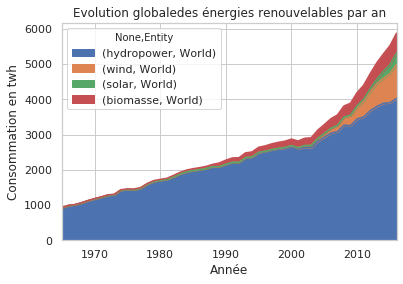

In [11]:
fig = plt.figure(figsize=(20, 10))
ax = data_mrec_clean[data_mrec_clean['Entity'] == "World"].set_index(['Year','Entity']).unstack().plot(y=['hydropower','wind', 'solar', 'biomasse' ] , kind='area')
ax.set_xlabel('Année')
ax.set_ylabel('Consommation en twh')
_ = ax.set_title('Evolution globaledes énergies renouvelables par an')

Text(0.5, 1.0, 'Evolution des investissements par an')

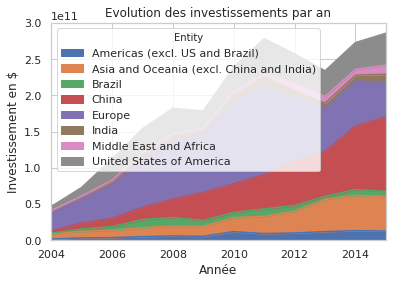

In [14]:
data_rei_clean = clean_data(data_rei)
ax = data_rei_clean.set_index(['Year','Entity']).unstack().plot(y='investment', kind='area')
ax.set_xlabel('Année')
ax.set_ylabel('Investissement en $')
ax.set_title('Evolution des investissements par an')

In [27]:
investment_by_tech = pd.read_csv(data_path / 'data_renewable_energy' / 'investment-in-renewable-energy-by-technology.csv')
investment_by_tech = investment_by_tech.set_index('Year')
investment_by_tech = investment_by_tech.loc[:, investment_by_tech.columns[2:]]

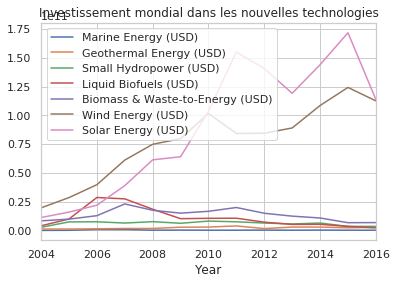

In [28]:
_ = investment_by_tech.plot(title='Investissement mondial dans les nouvelles technologies')

In [29]:
types_ = ["solar panels", "hydroelectricity", "onshore wind", "bioenergy", 
         "geothermal", "Concentrated Solar Power", "offshore wind"]

i = 4
for type_ in types_:
    df_c = pd.read_excel(data_path / "LCOE.xlsx", sheet_name=f"Figure 2.{str(i)}", usecols="J:L", header=1)
    df_c = df_c.rename(columns={'Year.2': 'année', 'Item.2': 'item'})
    df_c["type"] = type_
    df_c = df_c.set_index("année")
    if i > 4:
        df = pd.concat([df, df_c])
    else:
        df = df_c
    i +=1
    

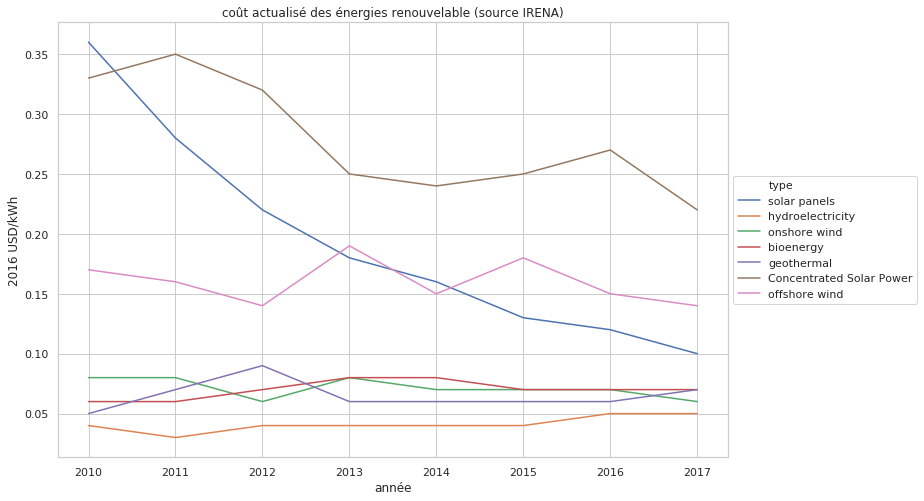

In [30]:
fig, ax = plt.subplots(figsize = (12,8))

data = df[df.item == 'Weighted Average']

sns.lineplot(data=data, x=data.index , y="2016 USD/kWh", hue="type", ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("coût actualisé des énergies renouvelable (source IRENA)")
plt.savefig("coût actualisé des énergies renouvelable (source IRENA)", dpi=500)
plt.show()


# Conclusion - Ouverture